In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [12]:
 #Cell 2: Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize the pixel values of the images (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Print shapes of the training and test data
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [13]:
#Define the CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [14]:
# Cell 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Adjusted to 'categorical_crossentropy' due to one-hot encoding
              metrics=['accuracy'])

In [16]:
# Cell 5: Train the Model with appropriate batch size and number of epochs
history = model.fit(x_train, y_train_one_hot, batch_size=64, epochs=10, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
782/782 [==============================] - 239s 304ms/step - loss: 1.5343 - accuracy: 0.4370 - val_loss: 1.1783 - val_accuracy: 0.5790
Epoch 2/10
782/782 [==============================] - 238s 305ms/step - loss: 1.1595 - accuracy: 0.5873 - val_loss: 1.0243 - val_accuracy: 0.6301
Epoch 3/10
782/782 [==============================] - 235s 301ms/step - loss: 0.9992 - accuracy: 0.6460 - val_loss: 0.8762 - val_accuracy: 0.6906
Epoch 4/10
782/782 [==============================] - 220s 281ms/step - loss: 0.8925 - accuracy: 0.6871 - val_loss: 0.8294 - val_accuracy: 0.7125
Epoch 5/10
782/782 [==============================] - 226s 289ms/step - loss: 0.8191 - accuracy: 0.7137 - val_loss: 0.7353 - val_accuracy: 0.7454
Epoch 6/10
782/782 [==============================] - 218s 279ms/step - loss: 0.7583 - accuracy: 0.7334 - val_loss: 0.6999 - val_accuracy: 0.7591
Epoch 7/10
782/782 [==============================] - 216s 276ms/step - loss: 0.7212 - accuracy: 0.7452 - val_loss: 0.6921 -

313/313 - 18s - loss: 0.6385 - accuracy: 0.7845 - 18s/epoch - 58ms/step

Test accuracy: 0.784500002861023


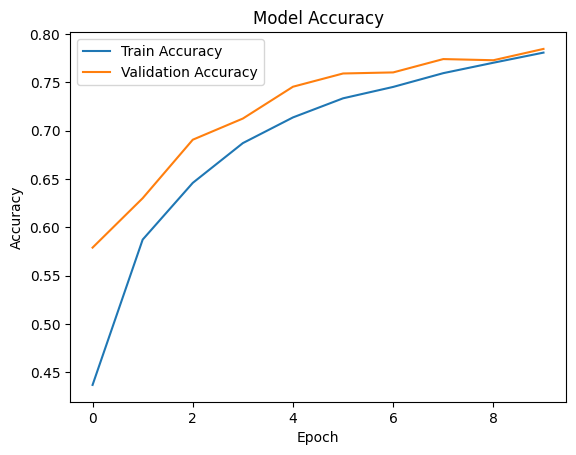

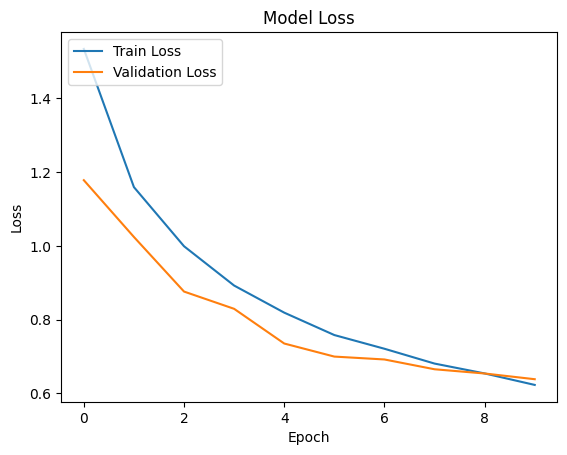

In [17]:
 #Cell 6: Evaluate the Model and Plot Performance
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()